# Regresión Lineal Multivariable

La regresión lineal múltiple es un método estadístico utilizado para predecir el resultado de una variable de respuesta mediante la combinación de numerosas variables explicativas o características. Es una variante de la regresión lineal (mínimos cuadrados ordinarios) en la que se utiliza una sola variable explicativa. \geeks

La siguiente es la relación lineal entre las variables dependientes e independientes:

$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 + \ldots$

Donde 
* $y$ = variable dependiente u objetivo
* $\beta_0$ = Intercepto de la regresión lineal
* $\beta_1, \beta_2, \beta_3, \dots, \beta_n$ = Pendiente de la línea de regresión que indica si la línea es creciente o decreciente.
* $X_1, X_2, X_3, \dots, X_n$ = Variable independiente, predictora
* $e$ = Error

## Aplicación del Método de Regresión Lineal

Este método será utilizado para predecir el precio de laptops en función de sus especificaciones. Los datos provienen del siguiente conjunto de datos, el cual servirá como base para entrenar el modelo y evaluar su precisión en la estimación de precios.

> **Fuente de los datos:**  
> 📊 [Dataset de precios de laptops](https://ejemplo.com/dataset)  
> Incluye 11 especificaciones: Compañía, producto (marca y modelo), tipo, tamaño de pantalla procesador, resolución de pantalla, CPU, RAM, memoria, GPU, sistema operativo y peso. 

### Preprocesamiento de datos para: "Laptop Price"

In [ ]:
#Importando librerías, numpy para cálculos matemáticos, matplotlib.pyplot para gráficas, pandas para poder leer y manipular el archivo con los datos y sklearn para poder hacer el Label Encoding.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
pd.options.mode.chained_assignment = None

#Leyendo los datos
df = pd.read_csv('./datasources/laptops/laptop_price.csv', encoding='latin-1')
df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


In [2]:
#Cantidad de filas y columnas en total
df.shape

(1303, 13)

In [3]:
df.duplicated().sum()

np.int64(0)

Por el momento, el archivo no tiene filas duplicadas.

$ \large \textbf{Exploración y limpieza inicial}$ 

* $\text{Analizando y convirtiendo datos:}$

Verificando que no falten datos:

In [4]:
df.isnull().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

En ninguna de las columnas hacen falta datos, por lo que no es necesario tomar otra acción.

Identificando los tipos de datos encontrados en el archivo:

In [5]:
df.dtypes

laptop_ID             int64
Company              object
Product              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price_euros         float64
dtype: object

Se eliminará la columna de "laptop_ID", ya que no nos aporta datos importantes para el entrenamiento del modelo.

In [6]:
df.drop('laptop_ID', axis=1, inplace=True)

Ahora se extraeran los datos encontrados en cada una de las columnas para poder ocuparlas cómo valores numéricos, las variables completamente nominales serán tratadas más adelante.

Para el peso se eliminará la parte de "kg", ya que se todos los pesos están expresados con las mismas unidades en toda la tabla, así se podrá trabajar con una variable de tipo float.

In [7]:
df['Weight']=df['Weight'].str.replace('kg','')
df['Weight']=df['Weight'].astype('float64')

Para la RAM, se eliminará "GB" de la misma forma.

In [8]:
df['Ram']=df['Ram'].str.replace('GB','')
df['Ram']=df['Ram'].astype('int64')

Luego se convertirá el precio de euros a dólares, para poder apreciar de mejor manera los resultados:

In [9]:
df.rename(columns={'Price_euros':'Price'}, inplace=True)
df.loc[:, 'Price'] *=1.13

* $\textbf{Valores extremos o Outliers}$\
Usando los diagramas de caja:

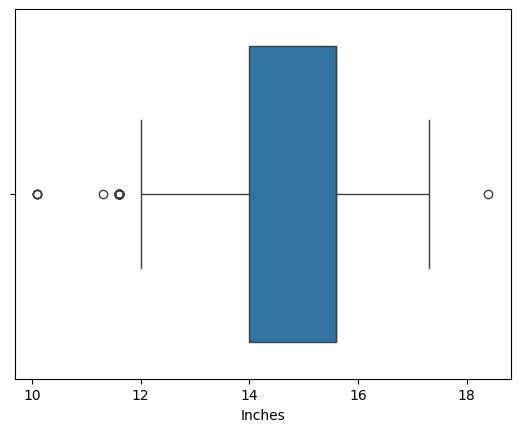

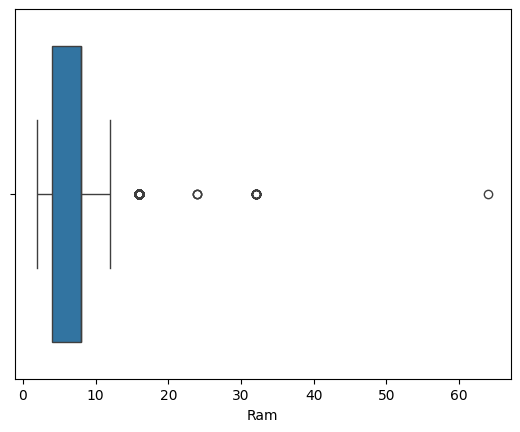

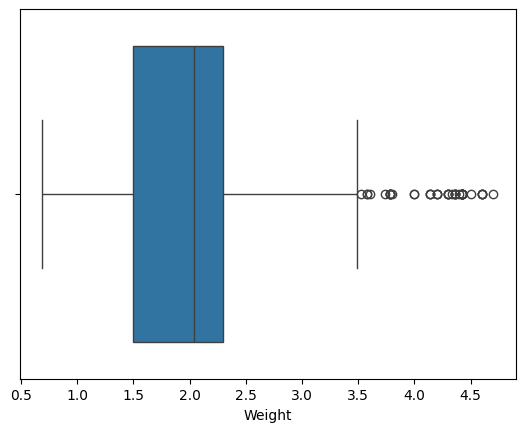

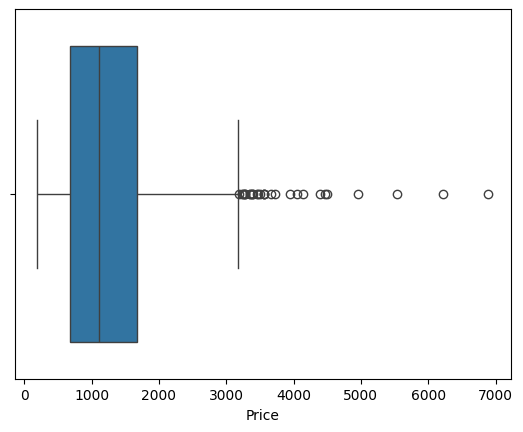

In [10]:
for i in df.select_dtypes(include='number').columns:
    sns.boxplot(data=df,x=i)
    plt.show()

No se graficarán las demás variables en este momento debido a que son nominales y serán tratadas luego.

* $\textbf{Duplicados:}$\
Identificando valores duplicados:

In [11]:
df.duplicated().sum()

np.int64(28)

Originalmente, como contabamos con la columna de "laptop_ID", no se marcaba ningún duplicado, pero al quitar esta salen 28 filas duplicadas, lo cual significa que si habían valores duplicados, los cuales solo tenían de diferencia la ID asignada, debido a esto es necesario ocupar la función drop_duplicates() de la librería Pandas.

In [12]:
df=df.drop_duplicates()

Comprobando que no queden duplicados:

In [13]:
df.duplicated().sum()

np.int64(0)

* $\textbf{Visualización:}$\
Hasta el momento solo se han obtenido 4 variables numéricas, por lo que si se utiliza una matriz de correlación se obtiene el siguiente resultado:

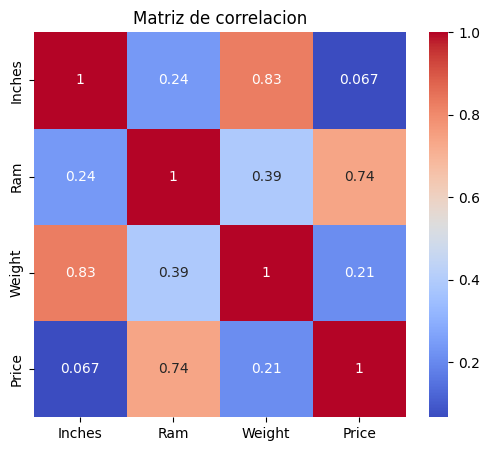

In [14]:
plt.figure(figsize=(6,5))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), cmap='coolwarm', annot=True)
plt.title('Matriz de correlacion')
plt.show()

Luego se observará esta matriz con los datos faltantes.

$ \large \textbf{Manejo de variables categóricas (Encoding)}$ 

* $\textbf{One-Hot Encoding:}$\
Primero se intentará ocupar la función pandas.get_dummies() para poder clasificar variables nominales usando el One-Hot Encoding, siendo estas: "Company", "Product", "TypeName", "ScreenResolution", "Cpu", "Memory", "Gpu" y "OpSys".

In [15]:
pd.get_dummies(df)

,Inches,Ram,Weight,Price,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,...,Gpu_Nvidia Quadro M620M,OpSys_Android,OpSys_Chrome OS,OpSys_Linux,OpSys_Mac OS X,OpSys_No OS,OpSys_Windows 10,OpSys_Windows 10 S,OpSys_Windows 7,OpSys_macOS
0,13.3,8,1.37,1513.8497,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,13.3,8,1.34,1015.8022,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,15.6,8,1.86,649.7500,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,15.4,16,1.83,2867.3185,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,13.3,8,1.37,2038.0680,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,14.0,4,1.80,720.9400,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1271,13.3,16,1.30,1693.8700,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1272,14.0,2,1.50,258.7700,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1273,15.6,6,2.19,863.3200,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


Como se puede observar, esta función crea demasiadas columnas, por lo que se trabajará con otro método más compacto.

* $\textbf{Label/Ordinal Encoding:}$\
Se ocupará este tipo de Encoding debido a que le asigna un valor a cada categoría de una columna, obteniendo así valores numéricos que podrán ser ocupados luego.

Aunque, antes de realizar este proceso se van a separar los campos de ciertas variables, empezando por la CPU, para así poder tener una variable correspondiente a la compañia junto al modelo de la "Cpu" y otra para la rapidez de esta, es decir los GHz.

In [16]:
#Para la frecuencia
def split_str(x):
    x = x.split(' ')
    return x[-1] 

df.loc[:,'CpuFrequency'] = df['Cpu'].apply(split_str)
df['CpuFrequency'] = df['CpuFrequency'].str.replace('GHz', '')
df['CpuFrequency'] = df['CpuFrequency'].astype('float64')

#Quitando la frecuencia para el modelo de la CPU
df['Cpu']= df['Cpu'].str.replace(r'(\d+(?:\.\d+)?GHz)', '', regex=True)
df.loc[:,'CpuModel']= df['Cpu']

#Eliminando la columna original
df.drop('Cpu', axis=1, inplace=True)

Ahora para la GPU:

In [17]:
#Para conseguir la marca
def split_str(x):
    x = x.split(' ')
    return x[0]

df.loc[:,'GpuBrand'] = df['Gpu'].apply(lambda x : split_str(x))

#Para conseguir el modelo
def split_model(x):
    x = x.split(' ')
    if len(x)==2:
        model = x[-1]
    elif len(x) == 3:
        model = x[-2:]  
    elif len(x) == 4:
        model = x[-3:]  
    elif len(x) == 5:
        model = x[-3:]  
    return ' '.join(model)

df.loc[:,'GpuModel'] = df['Gpu'].apply(split_model)

#Eliminando la columna original
df.drop('Gpu', axis=1, inplace=True)

Luego para la columna "Memory":

In [18]:
df.Memory.value_counts()

Memory
256GB SSD                        412
1TB HDD                          215
500GB HDD                        124
512GB SSD                        114
128GB SSD +  1TB HDD              94
128GB SSD                         74
256GB SSD +  1TB HDD              73
32GB Flash Storage                36
2TB HDD                           16
512GB SSD +  1TB HDD              14
1TB SSD                           14
64GB Flash Storage                13
256GB SSD +  2TB HDD              10
256GB Flash Storage                8
1.0TB Hybrid                       7
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
16GB SSD                           3
512GB SSD +  2TB HDD               3
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
64GB SSD                       

Como se puede observar, hay cuatro tipos de almacenamiento, SSD, HDD, Flash Storage y Hybrid, por lo que se separarán en columnas distintas:

In [19]:
df_clean = df.copy()

# Inicializar columnas
df_clean['Storage'] = 0
df_clean['SSD'] = 0
df_clean['HDD'] = 0
df_clean['Flash Storage'] = 0
df_clean['Hybrid'] = 0

# Función para convertir a GB en caso de tener TB
def parse_size(size_text):
    size_text = size_text.replace(" ", "")
    if "TB" in size_text:
        return int(float(size_text.replace("TB", "").replace("GB", "")) * 1000)
    elif "GB" in size_text:
        return int(float(size_text.replace("GB", "")))
    return 0

# Procesando filas
for i, row in df_clean.iterrows():
    memory = row['Memory']
    devices = memory.split('+')
    total = ssd = hdd = flash = hybrid = 0

    for device in devices:
        device = device.strip()
        parts = device.split()
        if len(parts) >= 2:
            size_text = parts[0]
            dtype = " ".join(parts[1:])
            size = parse_size(size_text)
            total += size
            if 'SSD' in dtype:
                ssd += size
            elif 'HDD' in dtype:
                hdd += size
            elif 'Flash Storage' in dtype:
                flash += size
            elif 'Hybrid' in dtype:
                hybrid += size

    df_clean.at[i, 'Storage'] = total
    df_clean.at[i, 'SSD'] = ssd
    df_clean.at[i, 'HDD'] = hdd
    df_clean.at[i, 'Flash Storage'] = flash
    df_clean.at[i, 'Hybrid'] = hybrid

#Borrando la columna original
df_clean.drop('Memory', axis=1, inplace=True)

#Aplicando los cambios a los datos originales
df=df_clean

También se realizará este proceso para la variable "ScreenResolution", consiguiendo así al tipo de pantalla como la variable "Screen" y la propia resolución como la variable "Resolution".

Finalmente, se usará el "Label Encoding" para todas las variables nominales:

In [20]:
#Extrayendo los valores de resolución
df.loc[:, 'Resolution'] = df['ScreenResolution'].str.extract(r'(\d+x\d+)')

#Creando columnas para el ancho y la altura de la resolución
df[['Width', 'Height']] = df['Resolution'].str.split('x', expand=True)
df['Width']=df['Width'].astype('int64')
df['Height']=df['Height'].astype('int64')

#Eliminando la columna original de la resolución
df.drop('Resolution', axis=1, inplace=True)

#Extrayendo el tipo de pantalla
df.loc[:, 'Screen'] = df['ScreenResolution'].str.replace(r'(\d+x\d+)','',regex=True)

#Eliminando las plecas en los strings de "Screen" para solo tener el propio tipo de pantalla
df['Screen'] = df['Screen'].replace(r'(/)','',regex=True)

#Separando entre el propio tipo de pantalla y si esta es táctil
df.loc[:, 'Touchscreen'] = df['Screen'].str.extract(r'(Touchscreen)')

#Y eliminando el string de "Touchscreen" para que solo quede el propio tipo de pantalla
df.loc[:,'Screen'] = df['Screen'].str.replace(r'(Touchscreen)','',regex=True)

#Reemplazando el texto de "Touchscreen" con valores binarios, debido a que las únicas opciones son que la pantalla sea o no sea táctil
with pd.option_context("future.no_silent_downcasting", True):
    df['Touchscreen'] = df['Touchscreen'].replace('Touchscreen',1).infer_objects(copy=False)
df['Touchscreen'] = df['Touchscreen'].replace(np.nan,0)
df['Touchscreen']=df['Touchscreen'].astype('int64')

#Se elimina la columna original, ya que ahora no es necesaria
df.drop('ScreenResolution', axis=1, inplace=True)

Realizando el propio Encoding:

In [21]:
df['Company']=preprocessing.LabelEncoder().fit_transform(df['Company'])
df['Product']=preprocessing.LabelEncoder().fit_transform(df['Product'])
df['TypeName']=preprocessing.LabelEncoder().fit_transform(df['TypeName'])
df['Screen']=preprocessing.LabelEncoder().fit_transform(df['Screen'])
df['CpuModel']=preprocessing.LabelEncoder().fit_transform(df['CpuModel'])
df['GpuBrand']=preprocessing.LabelEncoder().fit_transform(df['GpuBrand'])
df['GpuModel']=preprocessing.LabelEncoder().fit_transform(df['GpuModel'])
df['OpSys']=preprocessing.LabelEncoder().fit_transform(df['OpSys'])

In [22]:
#* $\textbf{Target Encoding:}$\
#Como este método se basa en la media de la variable de predicción, en este caso "Price", se obtendrán mejores resultados que con el One-Hot Encoding, ya que producirá resultados numéricos que se podrán utilizar inmediatamente.

Ahora nos hemos quedado con las siguientes columnas:

In [23]:
df.dtypes

Company            int64
Product            int64
TypeName           int64
Inches           float64
Ram                int64
OpSys              int64
Weight           float64
Price            float64
CpuFrequency     float64
CpuModel           int64
GpuBrand           int64
GpuModel           int64
Storage            int64
SSD                int64
HDD                int64
Flash Storage      int64
Hybrid             int64
Width              int64
Height             int64
Screen             int64
Touchscreen        int64
dtype: object

Todas son númericas por lo que podemos observar nuevamente los diagramas de caja, pero ahora con todas las variables.

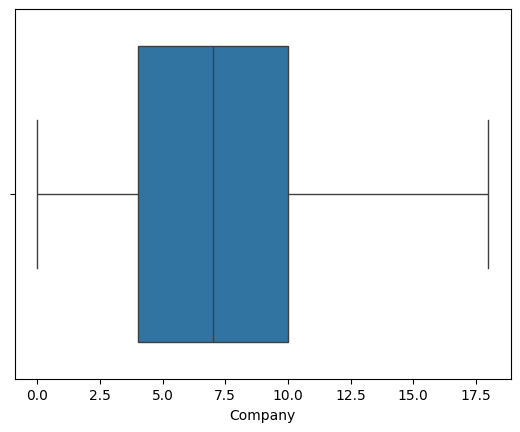

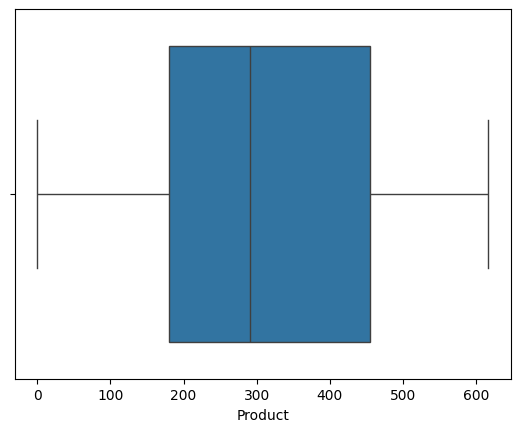

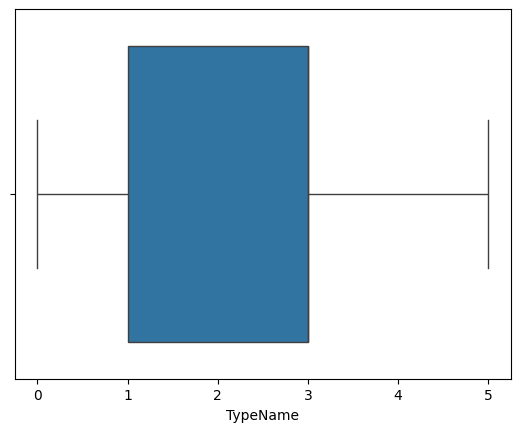

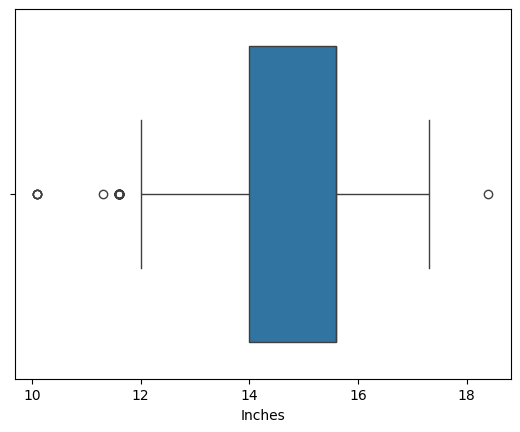

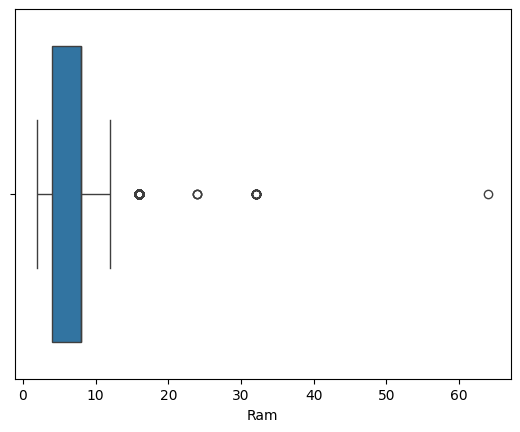

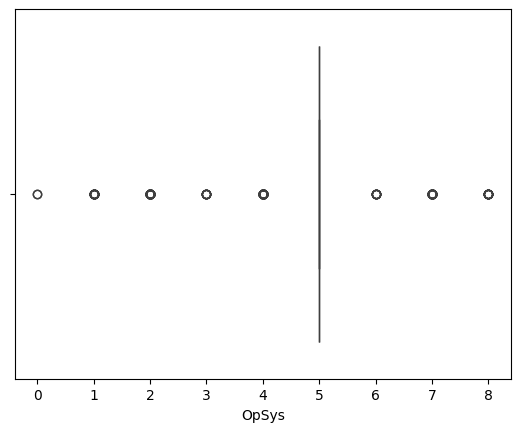

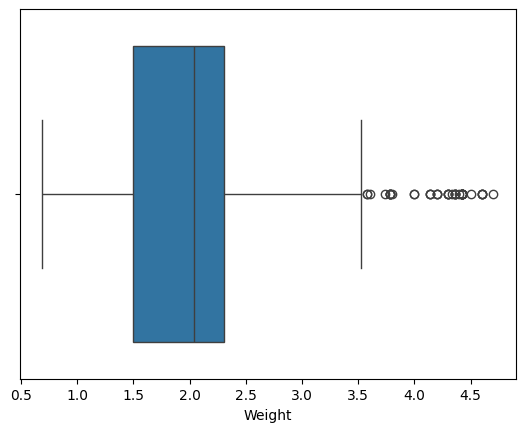

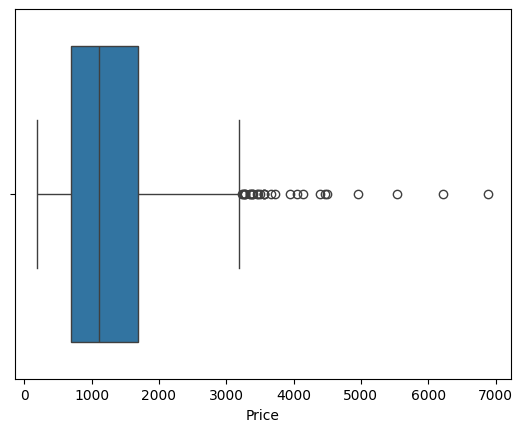

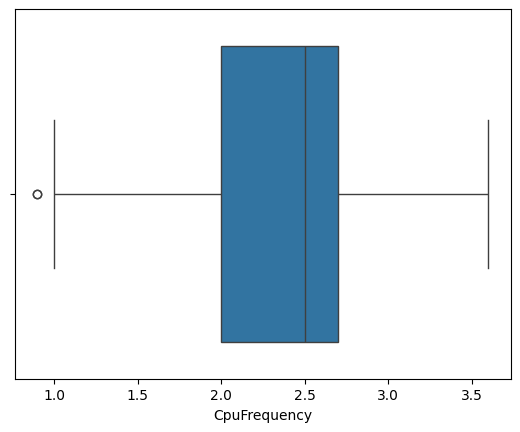

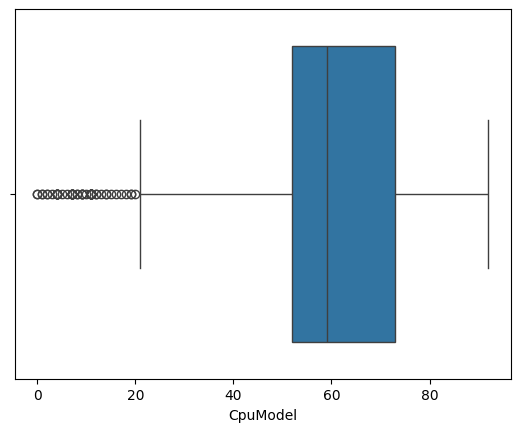

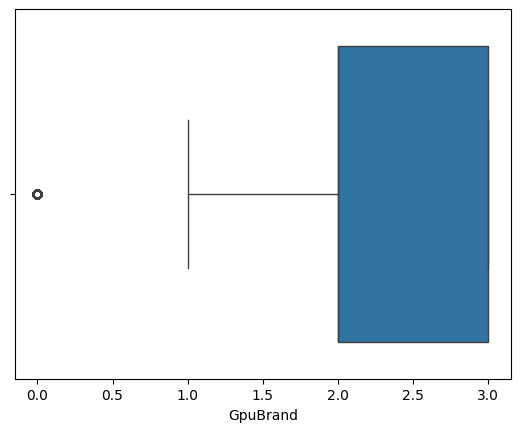

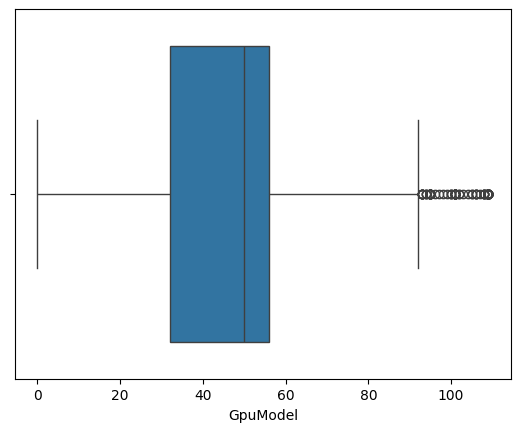

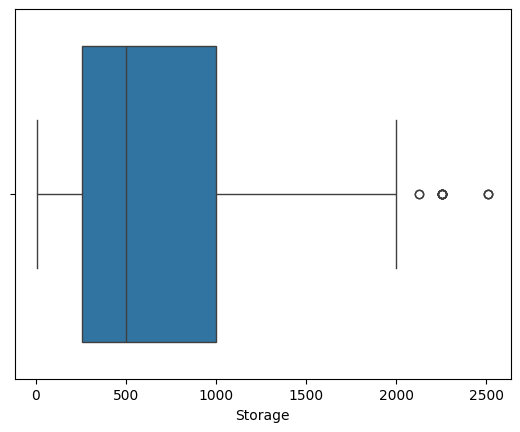

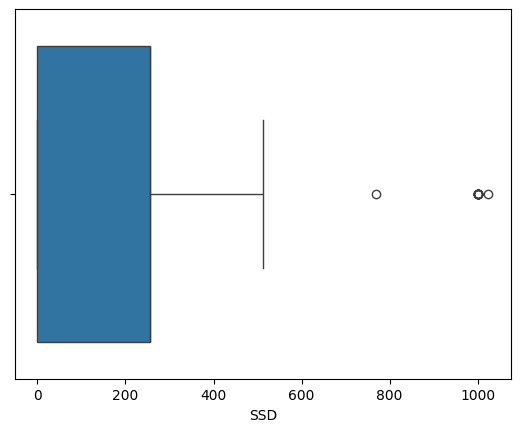

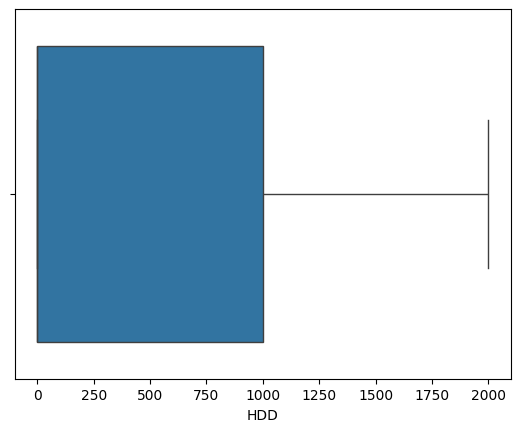

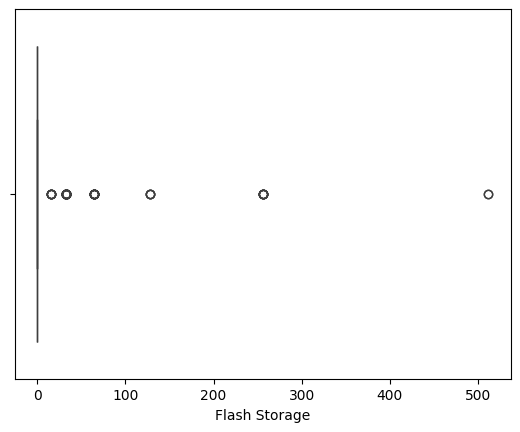

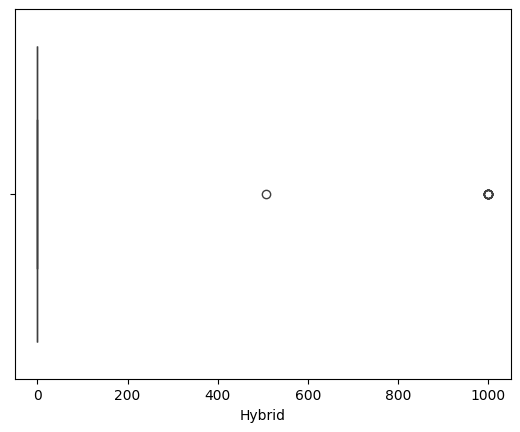

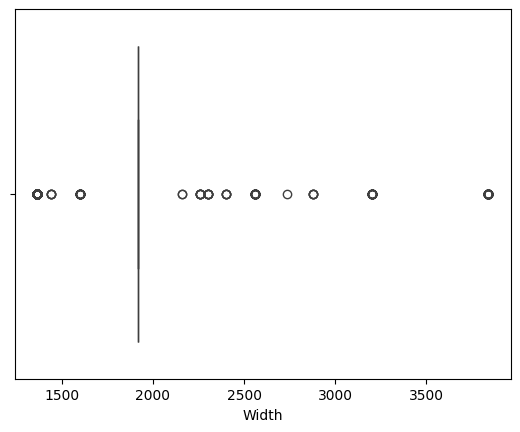

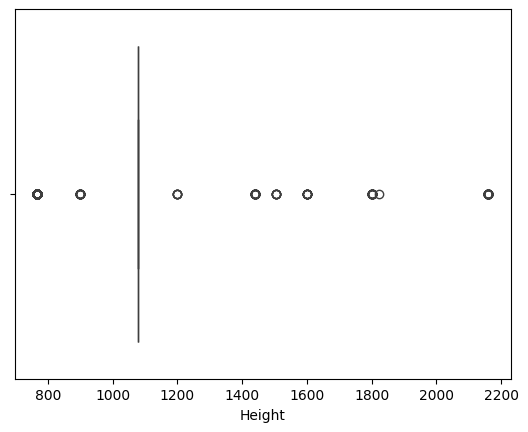

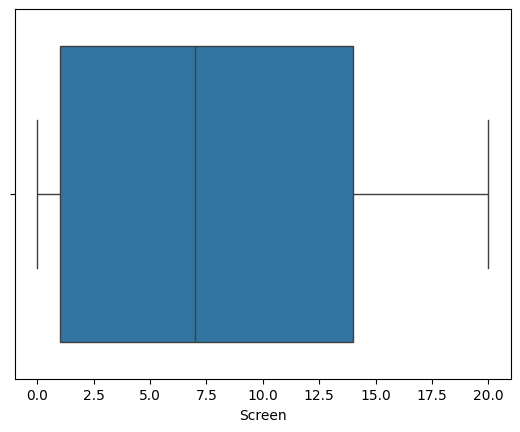

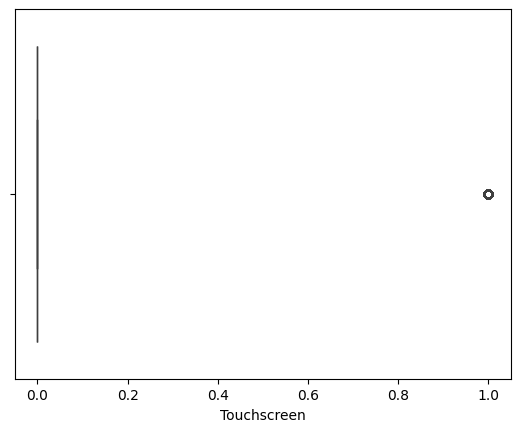

In [24]:
for i in df.select_dtypes(include='number').columns:
    sns.boxplot(data=df,x=i)
    plt.show()

* $\textbf{Normalización:}$\
Para poder ocupar el método del gradiente descendiente, es necesario tener variables normalizadas, se ocupará el método de "Mín. Máx." debido a que hay variables con distintas escalas dentro de los datos, por ejemplo, entre el peso y la RAM, ya que el peso se encuentra entre 0.6 y 5, mientras que la RAM se encuentra entre 2 y 64, comprobando esto:

In [25]:
df['Weight'].min()

np.float64(0.69)

In [26]:
df['Weight'].max()

np.float64(4.7)

In [27]:
df['Ram'].min()

np.int64(2)

In [28]:
df['Ram'].max()

np.int64(64)

Aplicando el método:

In [29]:
df_n=(df-df.min())/(df.max()-df.min())

#Observando como han quedado los cambios
df_n

,Company,Product,TypeName,Inches,Ram,OpSys,Weight,Price,CpuFrequency,CpuModel,...,GpuModel,Storage,SSD,HDD,Flash Storage,Hybrid,Width,Height,Screen,Touchscreen
0,0.055556,0.486224,0.8,0.385542,0.096774,1.000,0.169576,0.196741,0.518519,0.554348,...,0.568807,0.047923,0.125,0.00,0.000,0.0,0.482619,0.597701,0.90,0.0
1,0.055556,0.487844,0.8,0.385542,0.096774,1.000,0.162095,0.122353,0.333333,0.554348,...,0.495413,0.047923,0.000,0.00,0.250,0.0,0.029911,0.094828,0.00,0.0
2,0.388889,0.081037,0.6,0.662651,0.096774,0.500,0.291771,0.067679,0.592593,0.619565,...,0.513761,0.099042,0.250,0.00,0.000,0.0,0.223929,0.224138,0.35,0.0
3,0.055556,0.486224,0.8,0.638554,0.225806,1.000,0.284289,0.398895,0.666667,0.706522,...,0.733945,0.201278,0.500,0.00,0.000,0.0,0.611964,0.741379,0.90,0.0
4,0.055556,0.486224,0.8,0.385542,0.096774,1.000,0.169576,0.275038,0.814815,0.554348,...,0.577982,0.099042,0.250,0.00,0.000,0.0,0.482619,0.597701,0.90,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,0.555556,0.940032,0.0,0.469880,0.032258,0.625,0.276808,0.078312,0.592593,0.717391,...,0.458716,0.047923,0.125,0.00,0.000,0.0,0.223929,0.224138,0.75,1.0
1271,0.555556,0.952998,0.0,0.385542,0.225806,0.625,0.152120,0.223629,0.592593,0.717391,...,0.458716,0.201278,0.500,0.00,0.000,0.0,0.741310,0.741379,0.85,1.0
1272,0.555556,0.317666,0.6,0.469880,0.000000,0.625,0.201995,0.009283,0.259259,0.336957,...,0.394495,0.022364,0.000,0.00,0.125,0.0,0.000000,0.000000,0.00,0.0
1273,0.388889,0.003241,0.6,0.662651,0.064516,0.625,0.374065,0.099578,0.592593,0.717391,...,0.844037,0.396166,0.000,0.50,0.000,0.0,0.000000,0.000000,0.00,0.0


* $\textbf{Visualización:}$\
Ahora que todas las variables han sido normalizadas, ya se puede observar su relación por medio de una matriz de correlación:

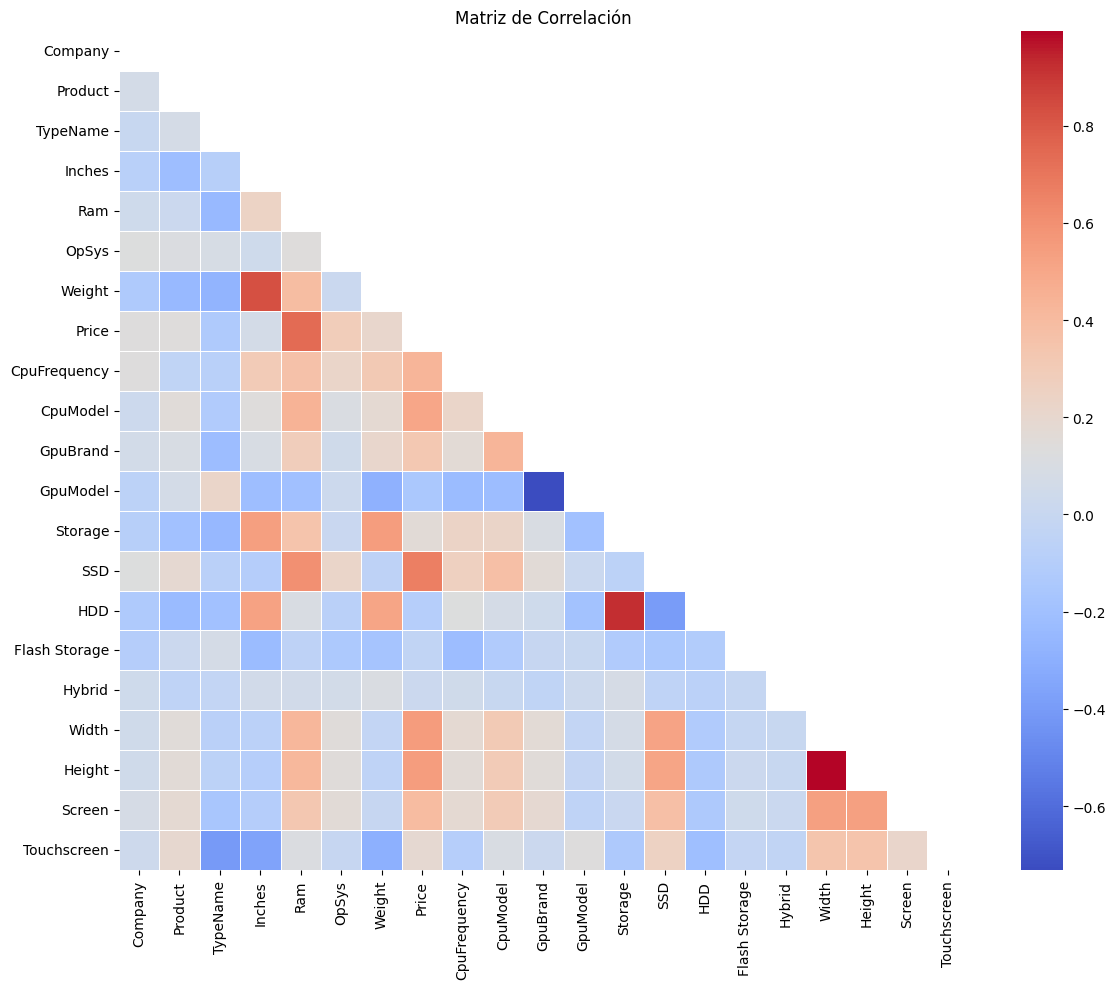

In [30]:
plt.figure(figsize=(12, 10))
correlation_matrix = df_n.corr()
mask = np.triu(correlation_matrix)
sns.heatmap(correlation_matrix, annot=False, mask=mask, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.tight_layout()
plt.show()

## Implementación de modelo

In [ ]:
# Separar características (X) y variable objetivo (y)
X = df_n.drop('Price', axis=1).values     # Todas las columnas excepto 'Price'
y = df_n['Price'].values.reshape(-1, 1)   # Solo la columna 'Price'

Para incluir el término indpendiente $\beta_0$ en las operaciones matriciales, agregamos una columna de 1's al inicio de x. 

In [ ]:
# np.hstack() concatena horizontalmente la columna de 1's con el resto de las características

# Para X (conjunto completo)
X = np.hstack((np.ones((X.shape[0], 1)), X))  

# Para X_test (conjunto de prueba)
X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))  

### División del conjunto de datos en un conjunto de entrenamiento y uno de prueba

Utilizamos una división de entrenamiento y prueba, diviendo el conjunto de datos en dos grupos. El conjunto de entrenamiento, utilizado para entrenar el modelo y el conjunto de prueba utilizado para evaluar su rendimiento. La división habitual para una cantidad de datos relativamente pequeña es de 70% - 30%.
Esto permite que el modelo aprenda patrones a partir de los datos de entrenamiento, dado que si el modelo se entrenara con todo el conjunto de datos, podría memorizarlos en lugar de aprender patrones generalizables a partir de una estimación imparcial. 


In [ ]:
# Fija la "semilla" del generador de números aleatorios de NumPy para garantizar reproducibilidad
np.random.seed(42)
y = y.reshape(-1, 1)

# Mezcla y división 70% de entrenamiento y 30% de prueba
perm = np.random.permutation(len(X))
n_train = int(len(X) * 0.7)

X_train, y_train = X[perm[:n_train]], y[perm[:n_train]]
X_test,  y_test  = X[perm[n_train:]], y[perm[n_train:]]

y_test = y_test.reshape(-1, 1)

In [ ]:
# Verificación de dimensiones del dataset completo
print(f"Dimensiones de X: {X.shape}")  # (1275, 14) → 1275 muestras, 13 features + 1 columna de bias
print(f"Dimensiones de y: {y.shape}")  # (1275, 1) → 1275 precios

# Verificación de dimensiones del conjunto de prueba
print("X_test shape:", X_test.shape)  # Debería ser (n_samples_test, n_features + 1)
print("y_test shape:", y_test.shape)  # Debería ser (n_samples_test, 1)

### Evaluación del rendimiento del modelo

Para evaluar el rendimiento de nuestro modelo con datos reales, calcularemos el error cuadrático medio (EMM) utilizando nuestros datos de prueba, que esperamos sean un buen indicador de los datos reales. Cuanto menor sea el valor, mejor será el rendimiento del modelo. 

\begin{equation}
\min _{\theta} \frac{1}{N}\sum_{i=1}^{N}\left(y_{i}-\hat{y}_i\right)^{2}
\end{equation}

In [ ]:
def compute_cost(X, y, theta):
    m      = len(y)
    errors = predict(X, theta) - y
    return (1/(2*m)) * np.sum(errors**2)

### Implementación descenso de gradiente

La regla de actualización para cada paso t es:

\begin{align*}
\theta^{(t+1)} = \theta^{(t)} - \alpha \frac{1}{m} X^\top \left( X \theta^{(t)} - y \right)
\end{align*}

In [ ]:
def gradient_descent(X, y, alpha=0.1, iterations=5000):
    m, n         = X.shape              # tupla (muestras, características)
    theta        = np.zeros((n,1))      # inicializa vector de coeficientes theta con ceros, tamaño (n,1)
    print("Dimensiones de theta:", theta.shape) # Verificacion de sus dimensiones
    cost_history = []
    for _ in range(iterations):
        errors = predict(X, theta) - y
        grad   = (1/m) * X.T.dot(errors)   # calcula el gradiente del costo
        theta  = theta - alpha * grad              # actualiza los coeficientes
        cost_history.append(compute_cost(X, y, theta))
    return theta, cost_history

### Coeficiente de determinación $R^2$


Evalúa la calidad del ajuste del modelo comparándolo con un modelo básico que siempre predice la media de y

In [ ]:
def r_squared(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred)**2)
    ss_tot = np.sum((y_true - np.mean(y_true))**2)
    return 1 - ss_res/(ss_tot + 1e-10) # 1e-10 evita división por cero